# EDA: MSME Credit Risk Dataset
Exploratory Data Analysis on MSME data.

In [4]:
import pandas as pd
import random

sectors = ["Retail", "Manufacturing", "Services", "Agri"]
locations = ["Low", "Medium", "High"]
risks = ["Low", "Medium", "High"]

data = []
for _ in range(500):
    data.append({
        "Annual_Revenue": random.randint(100000, 5000000),
        "Loan_Amount": random.randint(50000, 1000000),
        "Defaults": random.randint(0, 3),
        "Employees": random.randint(1, 100),
        "GST_Compliant": random.choice([0, 1]),
        "Sector": random.choice(sectors),
        "Location_Risk": random.choice(locations),
        "ONDC_Sales_Volume": random.randint(0, 500),
        "Avg_Order_Value": random.randint(100, 5000),
        "Seller_Rating": round(random.uniform(2.0, 5.0), 2),
        "Returns_Rate": round(random.uniform(0.01, 0.3), 2),
        "SLA_Delivery_%": round(random.uniform(0.6, 1.0), 2),
        "Months_Active_ONDC": random.randint(1, 24),
        "Risk": random.choice(risks)
    })

df = pd.DataFrame(data)
df.to_csv("cleaned_msme_data.csv", index=False)

cleaned_msme_data.csv created.


In [5]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Annual_Revenue      500 non-null    int64  
 1   Loan_Amount         500 non-null    int64  
 2   Defaults            500 non-null    int64  
 3   Employees           500 non-null    int64  
 4   GST_Compliant       500 non-null    int64  
 5   Sector              500 non-null    object 
 6   Location_Risk       500 non-null    object 
 7   ONDC_Sales_Volume   500 non-null    int64  
 8   Avg_Order_Value     500 non-null    int64  
 9   Seller_Rating       500 non-null    float64
 10  Returns_Rate        500 non-null    float64
 11  SLA_Delivery_%      500 non-null    float64
 12  Months_Active_ONDC  500 non-null    int64  
 13  Risk                500 non-null    object 
dtypes: float64(3), int64(8), object(3)
memory usage: 54.8+ KB


In [6]:
# Descriptive statistics
df.describe()

,Annual_Revenue,Loan_Amount,Defaults,Employees,GST_Compliant,ONDC_Sales_Volume,Avg_Order_Value,Seller_Rating,Returns_Rate,SLA_Delivery_%,Months_Active_ONDC
count,5.000000e+02,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,2.551235e+06,520623.272000,1.56600,49.760000,0.5200,254.978000,2460.722000,3.52350,0.151860,0.797980,12.146000
std,1.482910e+06,271597.031691,1.10094,29.164354,0.5001,145.732596,1381.046108,0.86968,0.084533,0.116134,7.069416
min,1.028920e+05,53065.000000,0.00000,1.000000,0.0000,2.000000,124.000000,2.01000,0.010000,0.600000,1.000000
25%,1.181776e+06,277152.750000,1.00000,24.750000,0.0000,127.000000,1237.250000,2.79000,0.080000,0.700000,6.000000
50%,2.596840e+06,527884.000000,2.00000,50.000000,1.0000,259.500000,2451.500000,3.53000,0.155000,0.790000,12.000000
75%,3.838866e+06,761808.500000,3.00000,75.000000,1.0000,378.250000,3634.250000,4.26250,0.230000,0.900000,18.000000
max,4.991536e+06,998875.000000,3.00000,100.000000,1.0000,500.000000,4997.000000,4.99000,0.300000,1.000000,24.000000


In [7]:
# Missing values check
df.isnull().sum()

,0
Annual_Revenue,0
Loan_Amount,0
Defaults,0
Employees,0
GST_Compliant,0
Sector,0
Location_Risk,0
ONDC_Sales_Volume,0
Avg_Order_Value,0
Seller_Rating,0


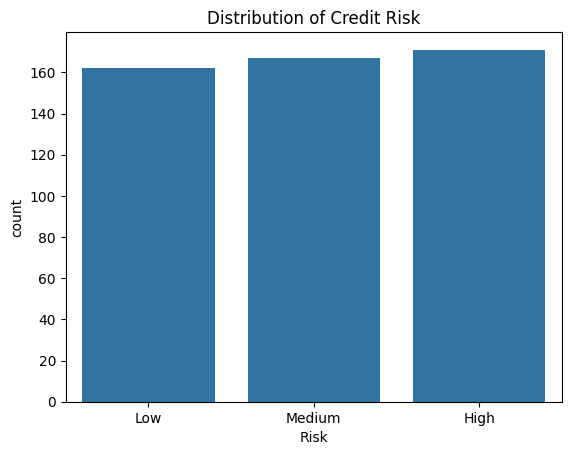

In [8]:
# Target distribution
sns.countplot(x="Risk", data=df)
plt.title("Distribution of Credit Risk")
plt.show()

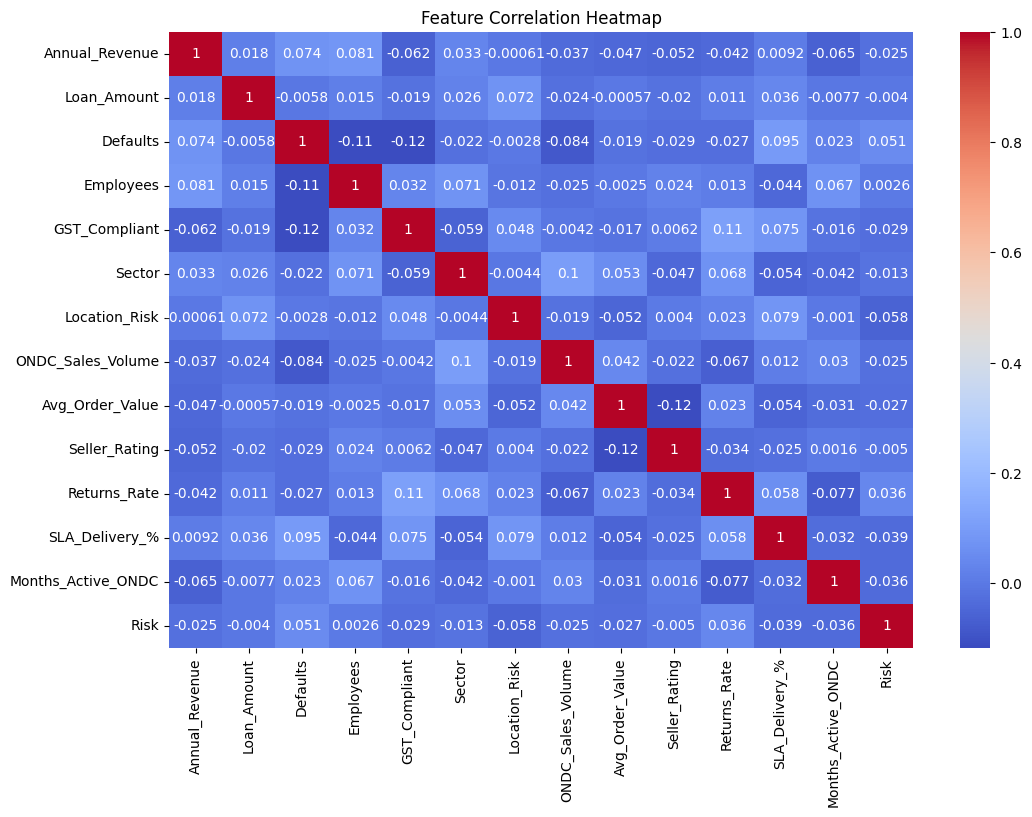

In [13]:
# Correlation heatmap
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

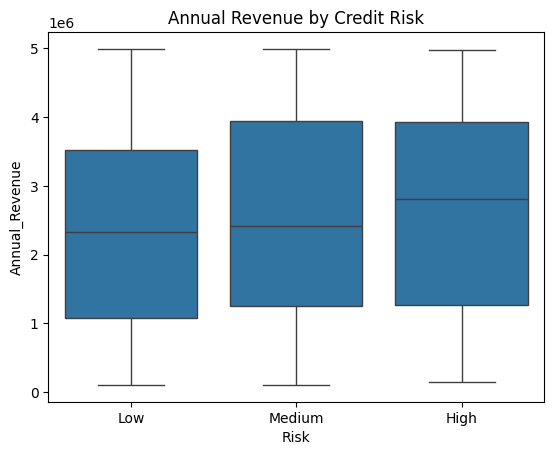

In [10]:
# Boxplot: Revenue vs Risk
sns.boxplot(x="Risk", y="Annual_Revenue", data=df)
plt.title("Annual Revenue by Credit Risk")
plt.show()

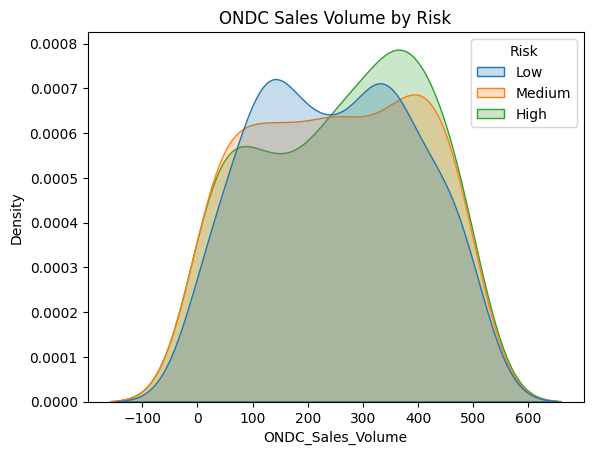

In [11]:
# KDE Plot: ONDC Sales Volume
sns.kdeplot(data=df, x="ONDC_Sales_Volume", hue="Risk", fill=True)
plt.title("ONDC Sales Volume by Risk")
plt.show()